# Setup

In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 9.4MB/s 
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [3]:
!pip3 install quandl

  Using cached Quandl-3.5.0-py2.py3-none-any.whl (25 kB)
  Using cached inflection-0.4.0-py2.py3-none-any.whl (5.8 kB)


In [155]:
!python -m pip install statsmodels 

Password:


In [10]:
import quandl
import pandas as pd
import stocker
quandl.ApiConfig.api_key = '1MN4xbFX3wwQNXvao-9-'
# quandl.ApiConfig.api_version = '2015-04-09'

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates
import seaborn as sns
%matplotlib inline



plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas_datareader import data
import datetime as dt


import warnings
import itertools
import numpy as np
import statsmodels.api as sm



In [2]:
# quandl.bulkdownload("GILD")
from pytrends.request import TrendReq

In [5]:
# data = quandl.get("WIKI/GILD", returns="numpy")

In [6]:
# data.shape

(6594,)

In [16]:
# df = pd.DataFrame(data)
# df.head

In [17]:
# quandl.bulkdownload("NSE")

In [3]:
# start is calculated as 365 days X years
years = 12
end = dt.datetime.today().strftime('%Y-%m-%d')  # today as the end date
start = (dt.datetime.today() - dt.timedelta(days=365*years)).strftime('%Y-%m-%d')  
GILD = data.DataReader('GILD', 'yahoo', start, end)
SGEN = data.DataReader('SGEN', 'yahoo', )

In [4]:
# nested column set in df
df = data.DataReader(('GILD', 'SGEN'), 'yahoo', start, end)

In [5]:
# df.head()
df['Adj Close', 'GILD']

Date
2008-05-09    23.276936
2008-05-12    23.641451
2008-05-13    23.203165
2008-05-14    22.808268
2008-05-15    22.977510
                ...    
2020-04-30    84.000000
2020-05-01    79.949997
2020-05-04    80.250000
2020-05-05    79.139999
2020-05-06    77.470001
Name: (Adj Close, GILD), Length: 3019, dtype: float64

In [6]:
# GILD = quandl.get('WIKI/GILD')


# SGEN = quandl.get('WIKI/SGEN')

In [7]:
type(GILD)

GILD.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [55]:

# from pandas.io.json import json_normalize
# json_normalize
# !pip install -U pandas

In [56]:
# !pip install --upgrade pip setuptools

# !pip install stocker
# !python3 -m pip install stocker
# from stocker import Stocker

# this is a working source https://github.com/jcamiloangarita/stocker
# import stocker

In [22]:
# amazon = Stocker('AMZN')
stocker.predict.tomorrow('AMZN')

[2330.11, 2.353, '2020-05-06']

In [58]:
# amazon.plot_stock()

In [59]:
# Stocker('GILD')

In [60]:
# import statsmodels.api as sm
# SARIMAXResults.get_prediction()


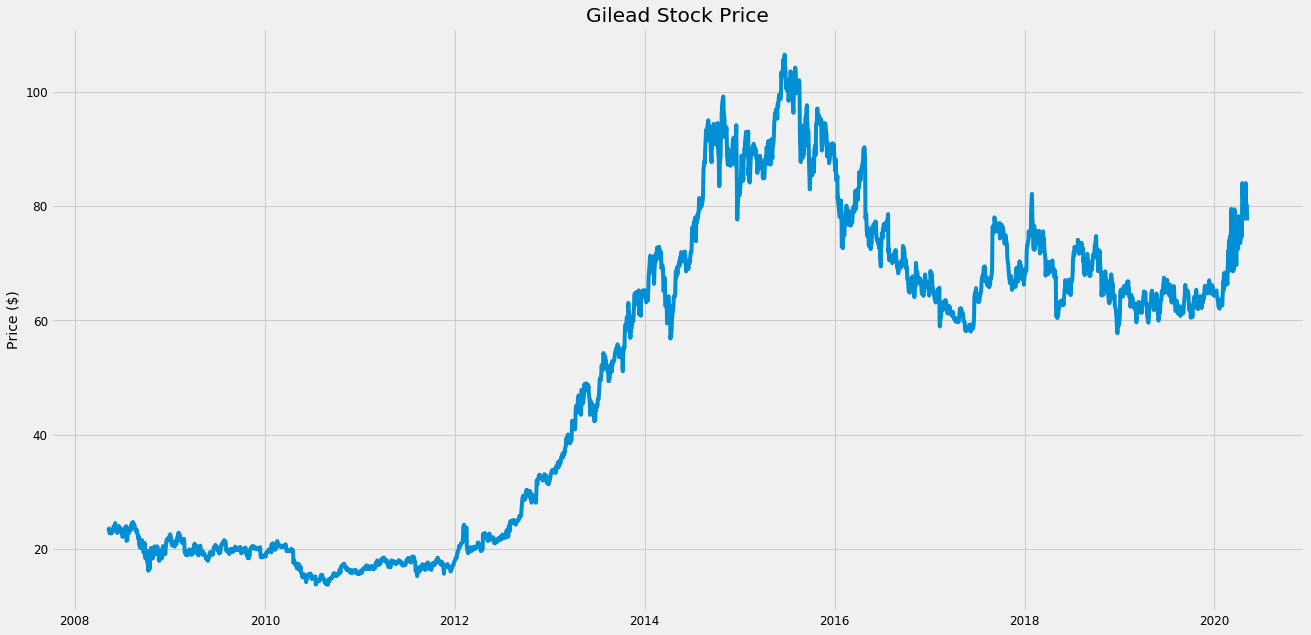

In [11]:
# The adjusted close accounts for stock splits, so that is what we should graph
# plt.plot(GILD.index, GILD['Adj. Close'])
plt.plot(GILD.index, GILD['Adj Close'])
plt.title('Gilead Stock Price')
plt.ylabel('Price ($)')
plt.show()

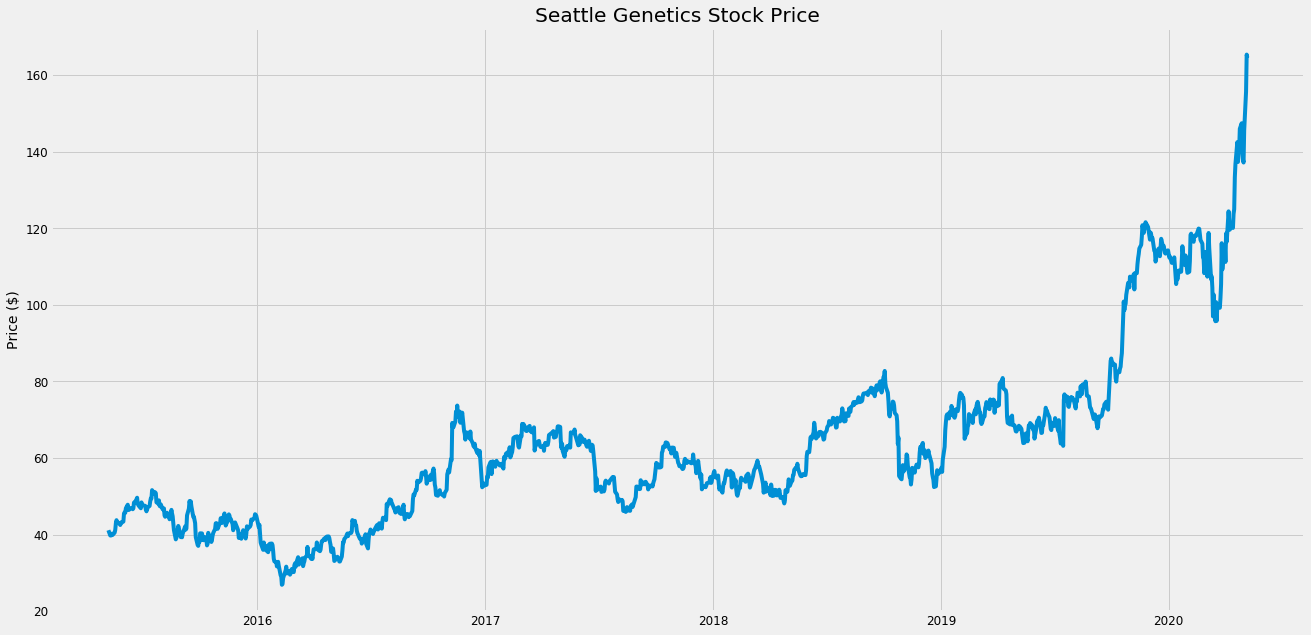

In [12]:
# plt.plot(SGEN.index, SGEN['Adj. Close'])
plt.plot(SGEN.index, SGEN['Adj Close'])
plt.title('Seattle Genetics Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [13]:
# !pip install --upgrade --force-reinstall holidays # version '0.10.2'
GILD.tail()
SGEN.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-30,140.899994,136.699997,138.990005,137.229996,2036700,137.229996
2020-05-01,157.000000,140.050003,141.000000,145.639999,2800000,145.639999
2020-05-04,155.889999,145.009995,145.009995,155.759995,2072200,155.759995
2020-05-05,168.100006,160.500000,163.119995,165.429993,2026800,165.429993
2020-05-06,167.509995,163.080002,166.429993,164.639999,1728300,164.639999


In [14]:
# !python3 -m pip install fbprophet
#from dateutil.easter import easter # fix for ImportError: cannot import name 'easter' from 'holidays' 
#(/Users/dpong/anaconda3/lib/python3.7/site-packages/holidays/__init__.py)
import plotly
import fbprophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
print(fbprophet.__version__)

0.6


In [15]:
import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.write_html('first_figure.html', auto_open=True)

In [16]:
GILD.reset_index(inplace = True)

In [17]:
# Prophet requires columns ds (Date) and y (value)

gild = GILD.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [18]:
gild

,ds,High,Low,Open,Close,Volume,y
0,2008-05-09,27.070000,26.625000,26.754999,26.820000,8105200.0,23.276936
1,2008-05-12,27.254999,26.625000,26.705000,27.240000,10956800.0,23.641451
2,2008-05-13,27.250000,26.615000,27.055000,26.735001,12710600.0,23.203165
3,2008-05-14,26.995001,26.200001,26.980000,26.280001,11182400.0,22.808268
4,2008-05-15,26.684999,26.065001,26.200001,26.475000,11145200.0,22.977510
...,...,...,...,...,...,...,...
3014,2020-04-30,85.669998,81.330002,85.470001,84.000000,39332600.0,84.000000
3015,2020-05-01,81.400002,77.620003,81.199997,79.949997,34498100.0,79.949997
3016,2020-05-04,81.760002,79.190002,81.620003,80.250000,19203000.0,80.250000
3017,2020-05-05,79.830002,78.510002,79.330002,79.139999,14925900.0,79.139999


# Effect of Changepoint Prior Scale

changepoint_prior_scale is parameter for the model to indicate how flexible the changepoints are allowed to be. In other words, to what extent can the changepoints fit to the data. I find out that it can't be too extreme. It can't be too small of a scale and too big of a scale. The higher it is, the more flexible the model will be. The drawback is you might end up overfitting.

In [31]:
# Try 3 different changepoints
for changepoint in [.0015, .15, 15]:
        model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
        model.fit(gild)
        
        future = model.make_future_dataframe(periods=365, freq = 'D')
        future = model.predict(future)
        
        gild[changepoint] = future['yhat']

/Users/dpong/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



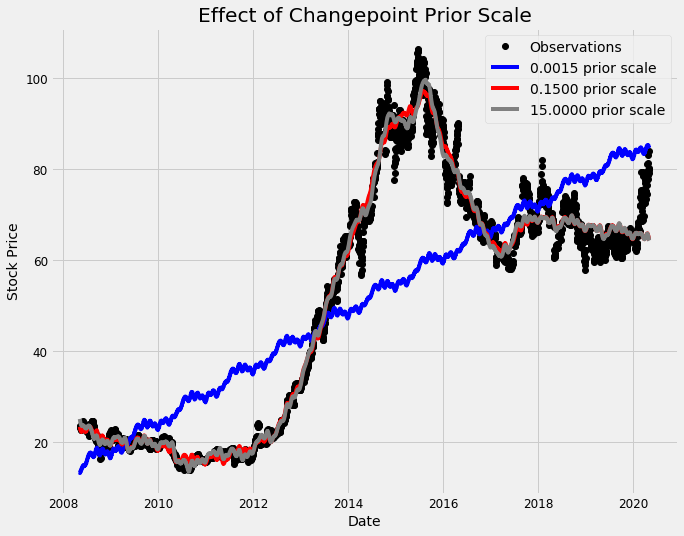

In [32]:
# Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(gild['ds'], gild['y'], 'ko', label = 'Observations')
colors = {.0015: 'b', .15: 'r', 15: 'grey'}

# Plot each of the changepoint predictions
for changepoint in [.0015, .15, 15]:
    plt.plot(gild['ds'], gild[changepoint], color = colors[changepoint], label = '%.4f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Stock Price'); plt.title('Effect of Changepoint Prior Scale');

# changepoint_prior_scale = 0.15 is what I end up using

In [19]:
# gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gild_prophet.fit(gild)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/dpong/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [20]:
# Make a future dataframe for 1 year
gild_forecast = gild_prophet.make_future_dataframe(periods=365 , freq='D')

# Make predictions 
gild_forecast = gild_prophet.predict(gild_forecast)

Text(0.5, 1, 'Stock Prices of Gilead (GILD)')

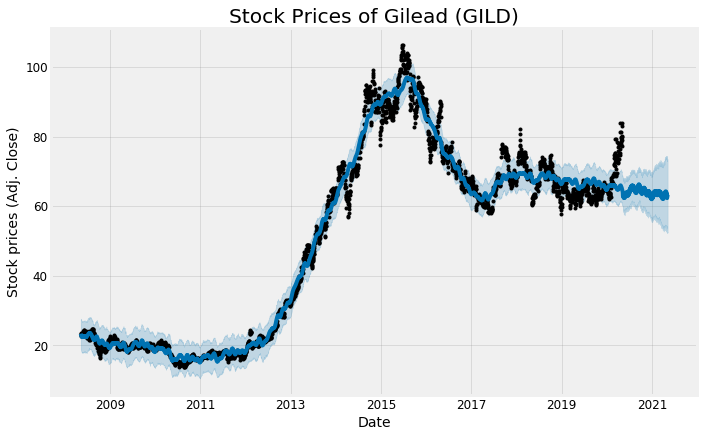

In [21]:
gild_prophet.plot(gild_forecast, xlabel = 'Date', ylabel = 'Stock prices (Adj. Close)')
plt.title('Stock Prices of Gilead (GILD)')

In [36]:
gild_prophet.changepoints[:10]

97    2008-09-25
193   2009-02-12
290   2009-07-02
386   2009-11-17
483   2010-04-09
579   2010-08-25
676   2011-01-12
772   2011-06-01
869   2011-10-18
966   2012-03-08
Name: ds, dtype: datetime64[ns]

In [37]:
gild_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
# !sudo pip3 install --upgrade pandas==0.25.3
# conda install -c conda-forge fbprophet==0.6

# Diagnostics

In [24]:
df_cv = cross_validation(gild_prophet, initial='730 days', period='180 days', horizon = '100 days')
df_cv.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2010-09-16 00:00:00 and 2020-01-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-17,14.174003,13.369617,15.007604,14.997218,2010-09-16
1,2010-09-20,14.056307,13.312156,14.832649,15.444182,2010-09-16
2,2010-09-21,14.044019,13.272355,14.861697,15.578709,2010-09-16
3,2010-09-22,13.996793,13.205304,14.813956,15.626441,2010-09-16
4,2010-09-23,13.921013,13.132618,14.751691,15.526632,2010-09-16


In [25]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,48.964406,6.997457,5.020588,0.077068,0.064062,0.334772
1,11 days,49.121972,7.008707,5.010887,0.077621,0.065881,0.316547
2,12 days,50.637003,7.115968,5.086176,0.079925,0.066423,0.290853
3,13 days,52.961960,7.277497,5.250789,0.083543,0.076548,0.251799
4,14 days,57.896071,7.608947,5.621115,0.089334,0.082554,0.213258
...,...,...,...,...,...,...,...
86,96 days,91.395370,9.560093,6.848708,0.108109,0.081474,0.427544
87,97 days,89.509097,9.460925,6.760785,0.107853,0.076850,0.445015
88,98 days,90.437451,9.509861,6.790742,0.109256,0.078039,0.446043
89,99 days,90.455383,9.510803,6.779408,0.109690,0.078039,0.465057


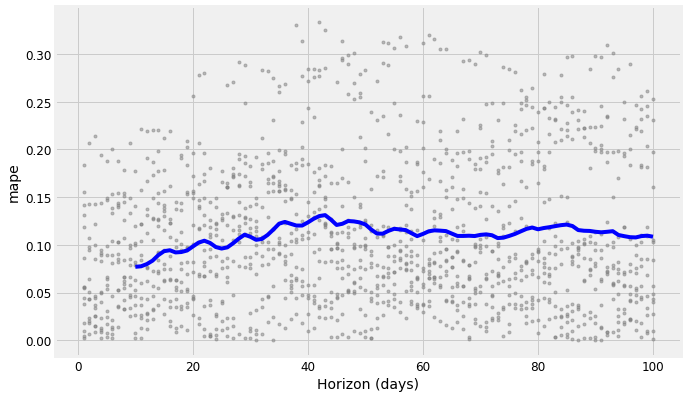

In [26]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

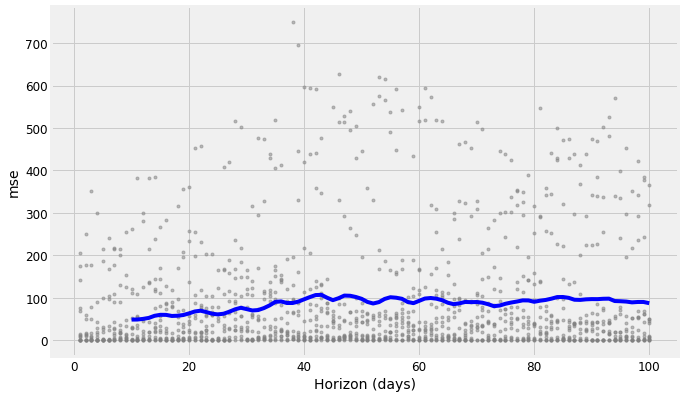

In [87]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

# Trends and Patterns

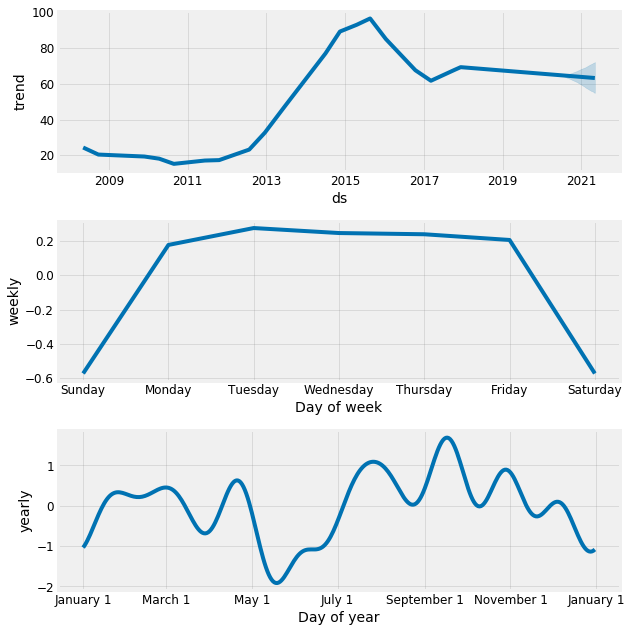

In [38]:
# Plot the trends and patterns
gild_prophet.plot_components(gild_forecast);

In [31]:
y = gild['y']
# y = y.fillna(y.bfill())

In [51]:
y = gild.set_index('ds')

In [58]:
y = y['y']

DatetimeIndex(['2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14',
               '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20',
               '2008-05-21', '2008-05-22',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='ds', length=3019, freq=None)

# Parameter Selection for the AIRMA Time Series Model

In [62]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
# train_data = ['']

In [64]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:33028.025911490506
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:29018.294780072916
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15702.938705325894
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:15586.542144565368
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15705.856176533774
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:15633.02898337048
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15583.969129190604
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:15578.265039261489
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:28907.5376964295
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:24990.444203595856
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:13168.462944489991
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12946.793338782036
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:13176.85767414433
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:13205.173615761843
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12955.68657087559
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12946.787797907902
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9031.301288416713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9007.59359327806


In [65]:
# printing the parameter combination that yeilds that lowest AIC 
print('The model SARIMAX{}x{} attains the lowest AIC of {} out of all the models we have considered. '
      .format(SARIMAX_model[AIC.index(min(AIC))][0], 
              SARIMAX_model[AIC.index(min(AIC))][1], 
              min(AIC)
             )
     )

The model SARIMAX(1, 1, 1)x(0, 0, 1, 12) attains the lowest AIC of 8994.172697818904 out of all the models we have considered. 


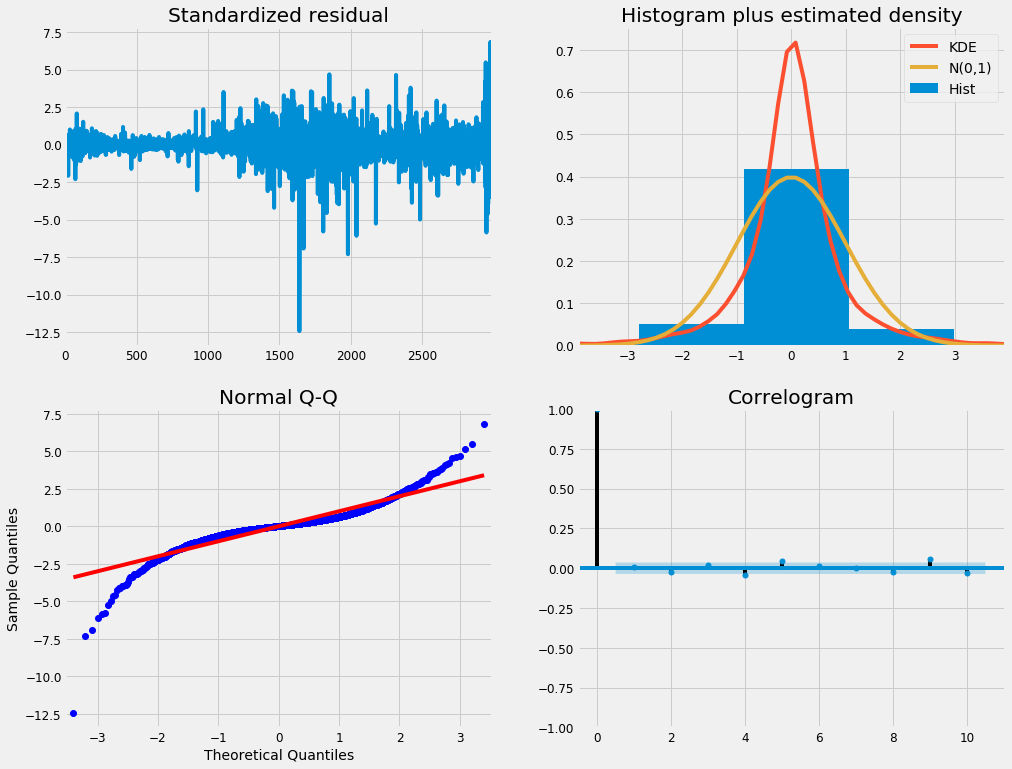

In [66]:
results.plot_diagnostics (figsize=(15, 12));

# Validating Forecasts

In [67]:
start

'2008-05-09'

In [68]:
y.head()

ds
2008-05-09    23.276936
2008-05-12    23.641451
2008-05-13    23.203165
2008-05-14    22.808268
2008-05-15    22.977510
Name: y, dtype: float64

In [69]:
# The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.


pred = results.get_prediction(start=pd.to_datetime(start), dynamic=False)
pred_ci = pred.conf_int()

In [91]:
accuracy(forecast(results, h = nrow))

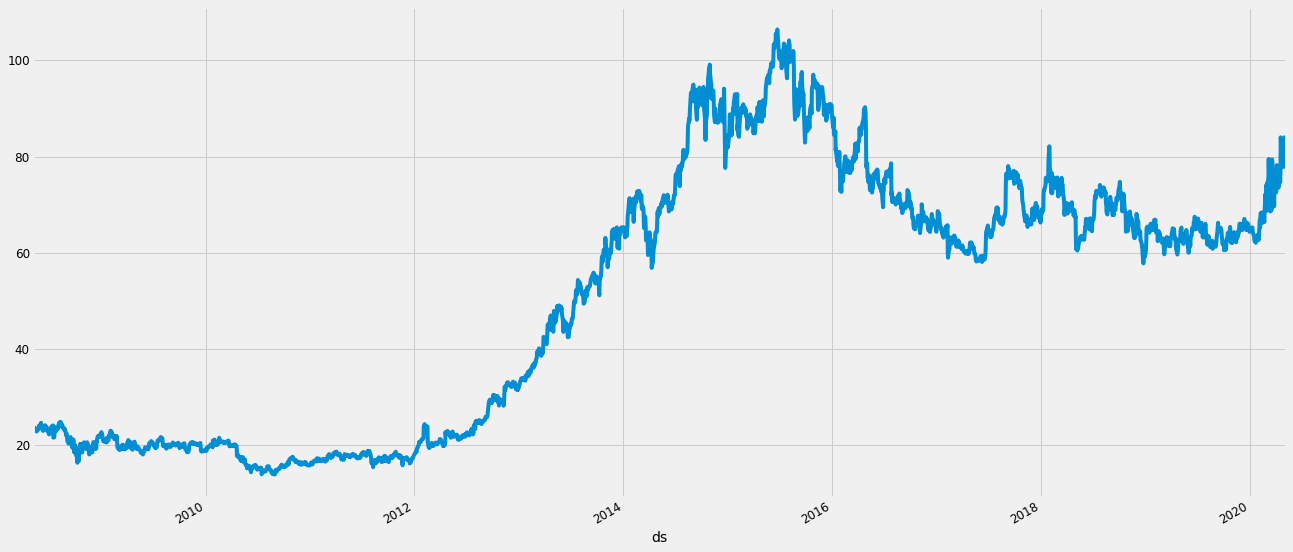

In [70]:
ax = y[start:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [83]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-03-18':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8.24


In [84]:
# changing gear to use dynamic forecasts and conf intervals from the start date onwards. 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-03-18'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

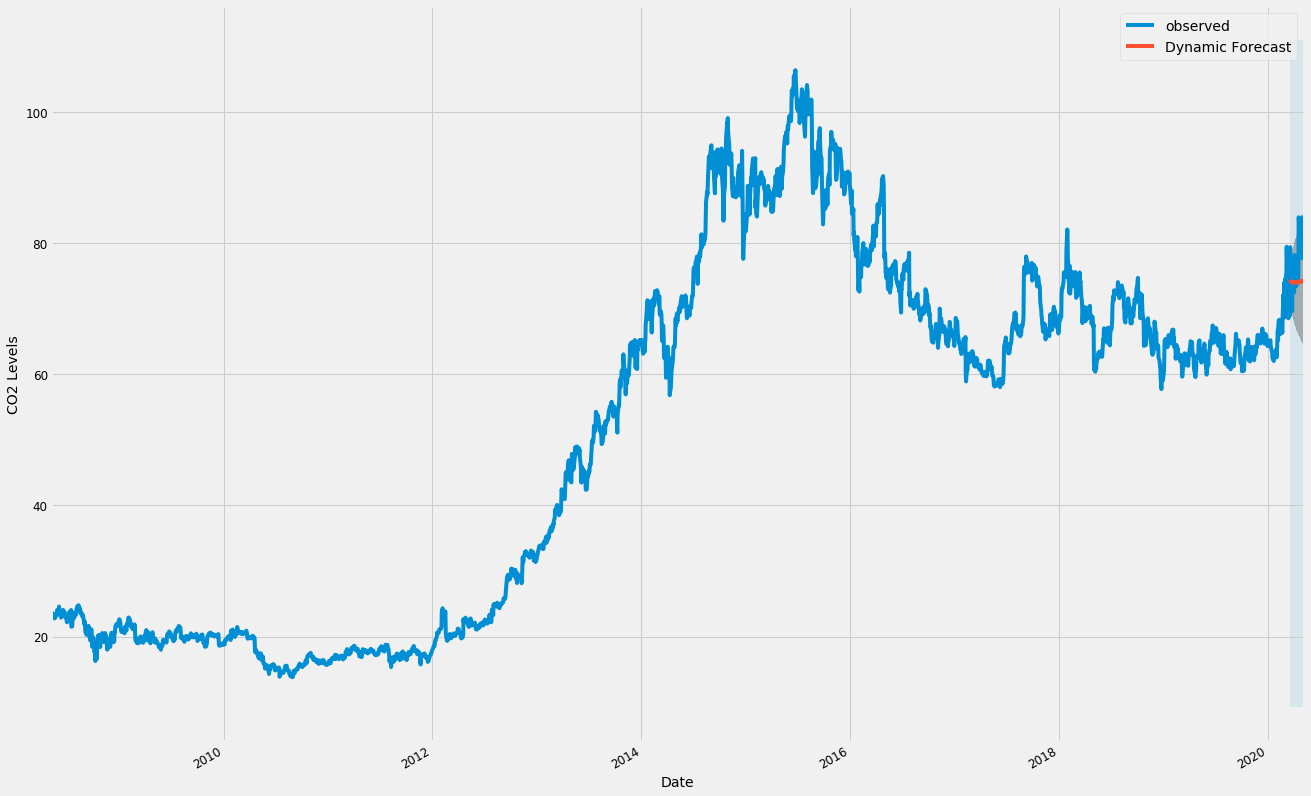

In [85]:
ax = y[start:].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-03-18'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [86]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2020-03-18':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 20.59


# Producing and Visualizing Forecasts

In [100]:
# Get forecast 365 steps ahead in future (~ 1 year)
pred_uc = results.get_forecast(steps=3656)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [105]:
x = [dt.datetime.fromtimestamp(element[0]) for element in pred_uc]
y = [element[1] for element in pred_uc]

TypeError: 'PredictionResultsWrapper' object is not iterable

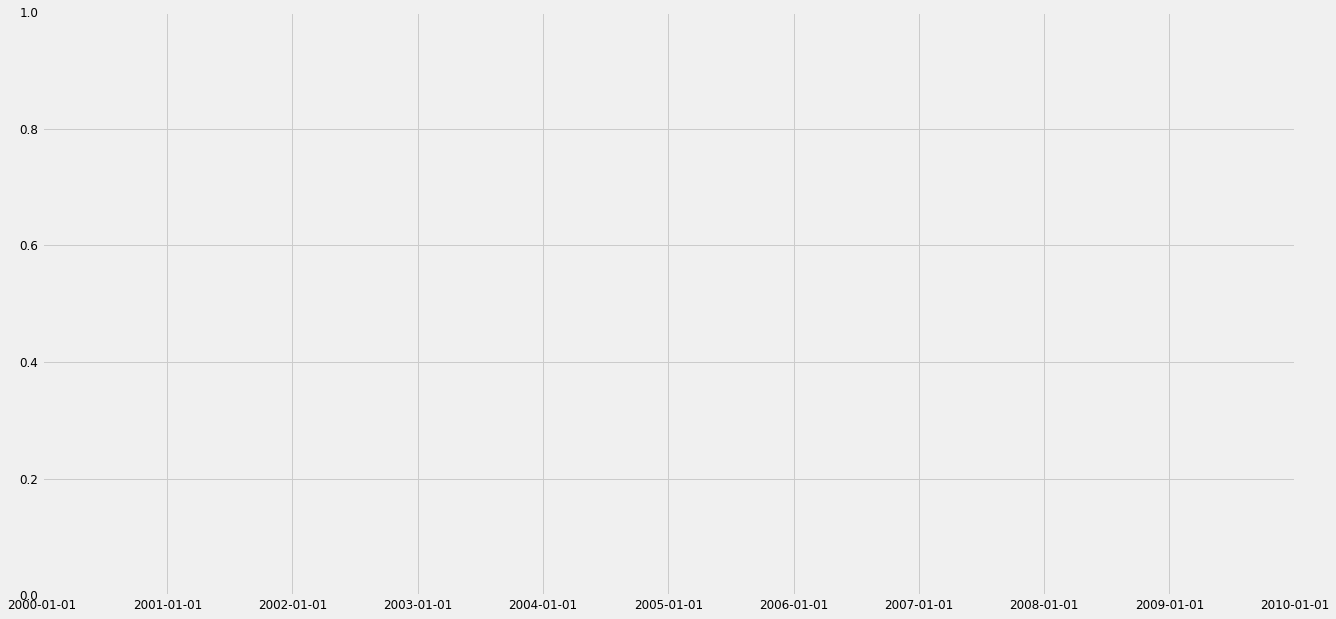

In [118]:
time_formatter = matplotlib.dates.DateFormatter("%Y-%m-%d")

plt.axes().xaxis_date()
ax = plt.axes().xaxis.set_major_formatter(time_formatter)
# ax.xaxis_date()

In [120]:
ax = y.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price (Adj Close)')

plt.legend()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-120-5c2b731be9be>, line 2)

In [104]:
pred_uc.predicted_mean.plot(ax = ax)

ValueError: year 0 is out of range

In [93]:
y

ds
2008-05-09    23.276936
2008-05-12    23.641451
2008-05-13    23.203165
2008-05-14    22.808268
2008-05-15    22.977510
                ...    
2020-04-30    84.000000
2020-05-01    79.949997
2020-05-04    80.250000
2020-05-05    79.139999
2020-05-06    77.470001
Name: y, Length: 3019, dtype: float64